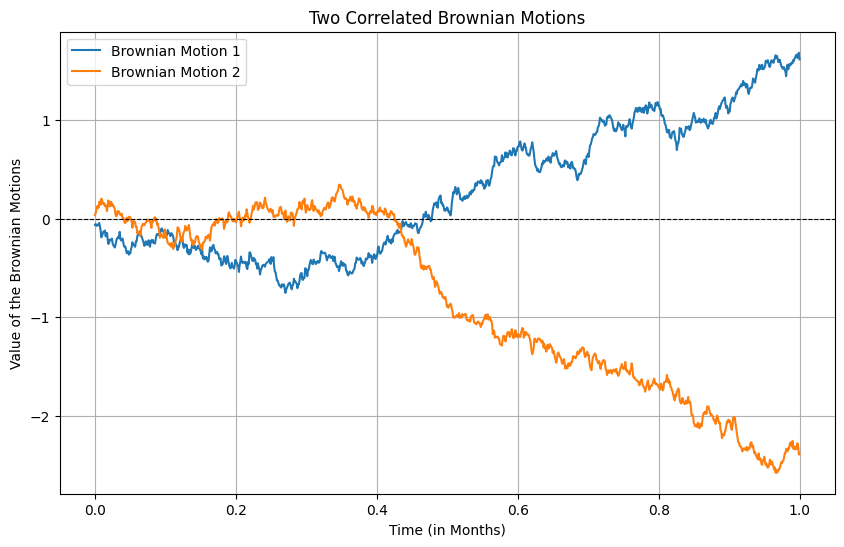

In [6]:
# 2 CORRELATED BROWNIAN MOTIONS

# The aim is to modelize the 'influence' two correlated Brownian Motions have on one another.
# The 2 Brownian motions represent the 'driving process' of the two different assets
# Cholesky decomposition : A definite positive symetric matrix 
# There exists an inf triangular matrix L such that A = L*(L)T

import numpy as np
import matplotlib.pyplot as plt

rho = -0.5 # Opposed movements and rho is in (-1, 1) so C is symetric positive definite
T = 1 # 1 Month
n_steps = 1000
time = np.linspace(0, T, n_steps) # Array of space times, subdivision
dt = T/n_steps # Time interval
C = np.array([[1, rho],    # Correlation matrix of the two brownian motions
              [rho, 1]])
L = np.array([[1, 0],      # Matrix L of the Cholesky decomposition of C, represents the correlation between each BM 
              [rho, np.sqrt(1-rho**2)]])  
dZ = np.random.normal(0, np.sqrt(dt), size = (2, n_steps))  # 2 because we study two BM, dZ has two dim
dW = L @ dZ  # Matrix multiplication : 2*2 and 2*1 --> 2*1
W = np.cumsum(dW, axis=1) # we have to integrate to get the continuous value bc infinitesimal notions


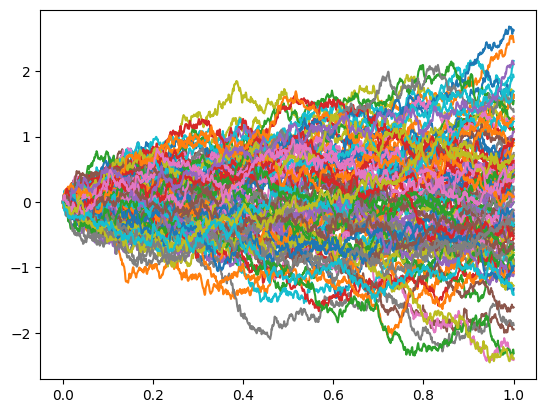

In [1]:
# CONSTRUCTION OF A BROWNIAN MOTION

# 1. Random generated Brownian Motions

import numpy as np
import matplotlib.pyplot as plt

T = 1 # 1 year
n_times = 1000 # Subdivise the year in 1/100 little intervals
dt = T/n_times # dt upon which I can define the infinitesimal Brownian Mouvement
times = np.linspace(0, T, n_times + 1) # include t=0 for the plot
number_of_MB = 100
W0 = np.zeros((number_of_MB, 1))
dW = np.random.normal(0, np.sqrt(dt), (number_of_MB, n_times)) # dW : 100*1000 
W = np.concatenate((W0, np.cumsum(dW, axis=1)), axis = 1) # W : 100*10001


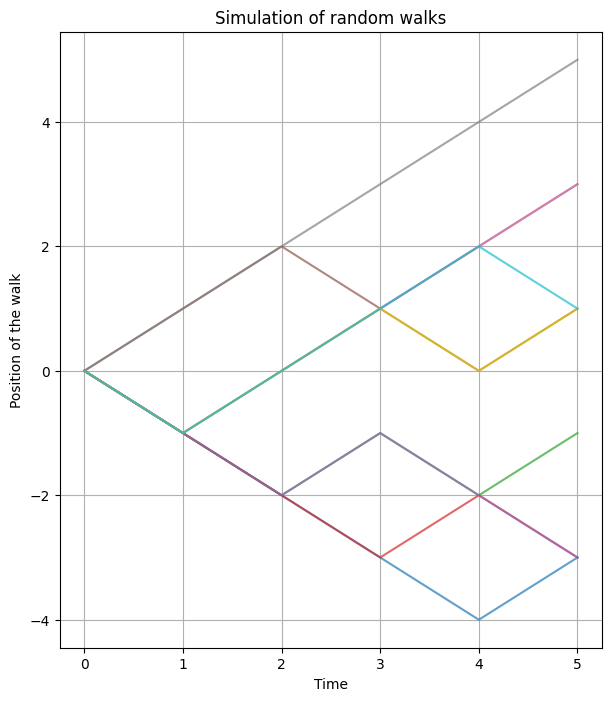

In [17]:
# 2. Random Walk

import math
import itertools 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

X = [-1, 1] # Random Walk
number_of_simulations = 10
stopping_time = 5 
Y = np.random.choice(X, size=(number_of_simulations, stopping_time))
Y0 = np.zeros((number_of_simulations, 1))
random_walks = np.concatenate((Y0,np.cumsum(Y, axis=1)), axis=1)

plt.figure(figsize=(7,8))
for i in range(number_of_simulations):
    plt.plot(range(stopping_time + 1), random_walks[i,:], label=f"Simulation {i+1}", alpha=0.7)

plt.title("Simulation of random walks")
plt.xlabel("Time")
plt.ylabel("Position of the walk")
plt.grid(True)
plt.show()

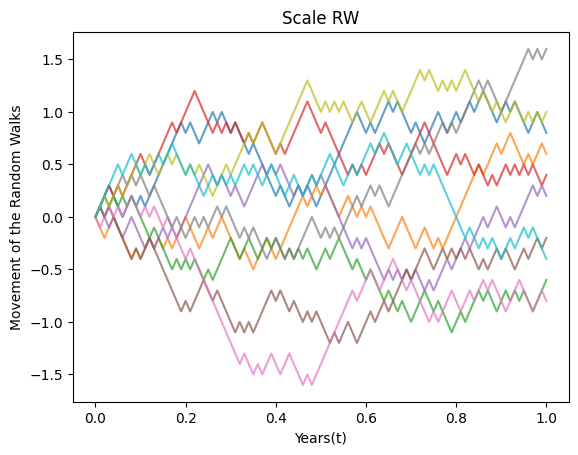

In [36]:
# 3. Quadratic Variation

import math
import itertools 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

X = [-1, 1] # Random Walk
number_of_simulations = 10
stopping_time = 5 
Y = np.random.choice(X, size=(number_of_simulations, stopping_time))
Y0 = np.zeros((number_of_simulations, 1))
random_walks = np.concatenate((Y0,np.cumsum(Y, axis=1)), axis=1)

# in Numpy, x[:-1] - x[1:] does the following :
# [2, 3, 4, 9] ---> [-1, -1, -5]
# round : arrondit le résultat avec trois décimaux

quadratic_variation = lambda x: round(np.square(x[:-1] - x[1:]).sum(), 3)
variance = lambda x: round(np.var(x, axis=0), 3) 



# 4. Scale Symetric Random Walk (used to approximate a Brownian Motion)

# W(n)(t) = M(nt) / sqrt(n) 
# M(nt) = sum from 1 to nt of Xk where Xk random walk
# Idea : subdivision of [0, t] in n infinitesimal intervals 
# So that when n goes to inf, we are in continuous time and we work with a Brownian Motion


random_walk = [-1, 1]
number_of_simulations = 10
t = 1 # Time
number_of_intervals = 100 # Subdivision of [0, 1] in 100 intervals

walking_vector = np.random.choice(random_walk, size=(number_of_simulations, number_of_intervals))
initialized_vector = np.zeros((number_of_simulations, 1))
complete_vector = np.cumsum(walking_vector, axis=1)
final_vector = np.concatenate((initialized_vector, complete_vector), axis=1)
# size of final_vector : 10*1001

scaled_random_walk = (1/np.sqrt(number_of_intervals)) * final_vector # size: 10*1001

time = np.linspace(0, t, number_of_intervals + 1) # +1 bc there is the initilized vector (time 0)

for i in range(number_of_simulations):
    plt.plot(time, scaled_random_walk[i, :], label=f"Simulation {i+1}", alpha=0.7)

plt.title("Scale RW")
plt.xlabel("Years(t)")
plt.ylabel("Movement of the Random Walks")
plt.show()


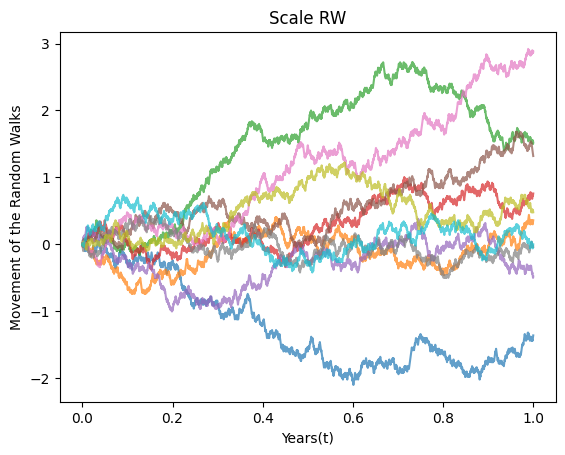

In [39]:
# 5. Extension of the precedent part
# The purpose of this section is to show how W(n)(t) converges to a Brownian Motion
# when n goes to inf
# Same code than precedently, just a change of number of intervals : 2500

random_walk = [-1, 1]
number_of_simulations = 10
t = 1 
number_of_intervals = 2500 # Subdivision of [0, 1] in 2500 intervals

walking_vector = np.random.choice(random_walk, size=(number_of_simulations, number_of_intervals))
initialized_vector = np.zeros((number_of_simulations, 1))
complete_vector = np.cumsum(walking_vector, axis=1)
final_vector = np.concatenate((initialized_vector, complete_vector), axis=1)


scaled_random_walk = (1/np.sqrt(number_of_intervals)) * final_vector # size: 10*1001

time = np.linspace(0, t, number_of_intervals + 1) # +1 bc there is the initilized vector (time 0)

for i in range(number_of_simulations):
    plt.plot(time, scaled_random_walk[i, :], label=f"Simulation {i+1}", alpha=0.7)

plt.title("Scale RW")
plt.xlabel("Years(t)")
plt.ylabel("Movement of the Random Walks")
plt.show()

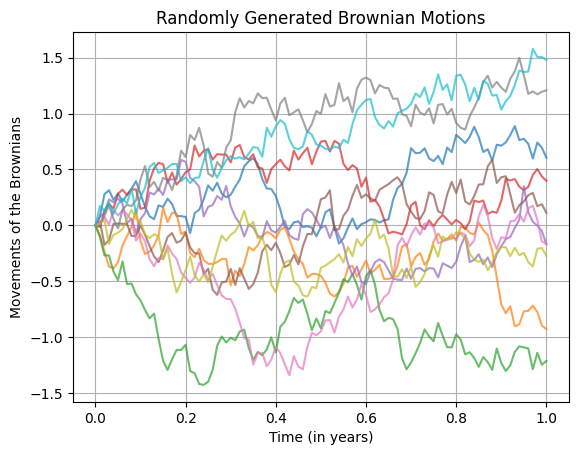

In [42]:
# 6. Brownian Motions

import numpy as np
import matplotlib.pyplot as plt

T = 1 # 1 Year
number_of_samples = 10
subdivision = 100
dt = T/subdivision # infinitesimal interval
W0 = np.zeros((number_of_samples, 1))
dW = np.random.normal(0, np.sqrt(dt), size=(number_of_samples, subdivision))
W = np.cumsum(dW, axis=1)
final_brownian = np.concatenate((W0, W), axis=1)

time = np.linspace(0, T, subdivision + 1)
for i in range(number_of_samples):
    plt.plot(time, final_brownian[i, :], label=f"Simulation {i+1}", alpha=0.7)

plt.title("Randomly Generated Brownian Motions")
plt.xlabel("Time (in years)")
plt.ylabel("Movements of the Brownians")
plt.grid(True)
plt.show()

# We notice little to no differences with the precedent section
